In [1]:
import pandas as pd
import os

# List of all pickle files
pklfiles = [f for f in os.listdir('processed') if os.path.isfile(os.path.join('processed', f)) and f.endswith('.pkl')]
print(pklfiles)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'processed'

In [ ]:
# Load one
video = 'chega-be'
data = pd.read_pickle(os.path.join('processed', video + '.pkl'))

# Print first lines
data.head() 

,filename,detections,poses,faces,text,embedding,fer
0,img00116.jpeg,"[[192, 39, 710, 611, person, 0.85546875], [106...","[[[0.5287994146347046, 0.38902580738067627, -0...","[[[0.5354748964309692, 0.4468356966972351, -0....","[=3, {2624, MRRAAA, O1:OI, OO:OO, vANPB)A]","[1, 253, 255, 1, 1, 255, 1, 1, 0, 10, 253, 8, ...","[{'location': [463, 750, 117, 404], 'embedding..."
1,img01657.jpeg,"[[360, 16, 782, 686, person, 0.91015625], [105...","[[[0.5852636694908142, 0.3498694896697998, -0....","[[[0.5782243013381958, 0.41002634167671204, -0...","[MRRAGA, 13.39, 13.50, vANPBRA, /, 2024]","[253, 2, 253, 0, 254, 254, 3, 253, 255, 8, 0, ...","[{'location': [597, 899, 90, 393], 'embedding'..."
2,img00589.jpeg,"[[669, 16, 610, 686, person, 0.93359375], [26,...","[[[0.274549663066864, 0.38907337188720703, -0....","[[[0.27605170011520386, 0.4545535743236542, -0...","[=3, 1, MORRAGA, 03.54, 04834, vANPBRA, 2824]","[253, 2, 2, 0, 254, 253, 2, 254, 3, 6, 0, 6, 5...","[{'location': [160, 444, 127, 411], 'embedding..."
3,img00264.jpeg,"[[631, 38, 633, 673, person, 0.94140625], [9, ...","[[[0.28526628017425537, 0.4065382480621338, -0...","[[[0.26723700761795044, 0.4672597646713257, -0...","[23, 82524, MORRAGA, 01.46, 01.21, vANPBRA]","[253, 2, 0, 6, 254, 254, 0, 254, 6, 9, 0, 4, 0...","[{'location': [194, 472, 135, 414], 'embedding..."
4,img00070.jpeg,"[[202, 33, 726, 610, person, 0.87890625], [107...","[[[0.5045007467269897, 0.4107182025909424, -0....","[[[0.5132942199707031, 0.46098387241363525, -0...","[=3, 82624, MPRRIAGA, 00.25, OO:OO, vANPBRA]","[1, 253, 255, 4, 0, 254, 3, 1, 1, 14, 253, 6, ...","[{'location': [434, 724, 131, 421], 'embedding..."


In [ ]:
data.iloc[0]

filename                                          img00116.jpeg
detections    [[192, 39, 710, 611, person, 0.85546875], [106...
poses         [[[0.5287994146347046, 0.38902580738067627, -0...
faces         [[[0.5354748964309692, 0.4468356966972351, -0....
text                 [=3, {2624, MRRAAA, O1:OI, OO:OO, vANPB)A]
embedding     [1, 253, 255, 1, 1, 255, 1, 1, 0, 10, 253, 8, ...
fer           [{'location': [463, 750, 117, 404], 'embedding...
Name: 0, dtype: object

In [ ]:
frame_id = data.iloc[0]['filename']
print(frame_id)

img00116.jpeg


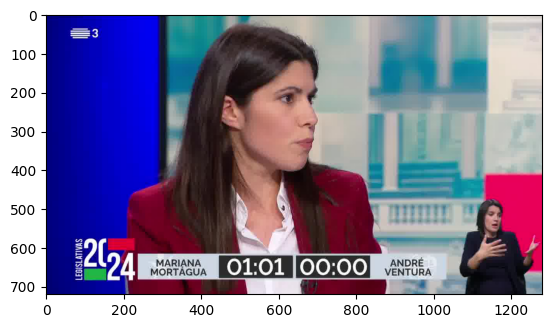

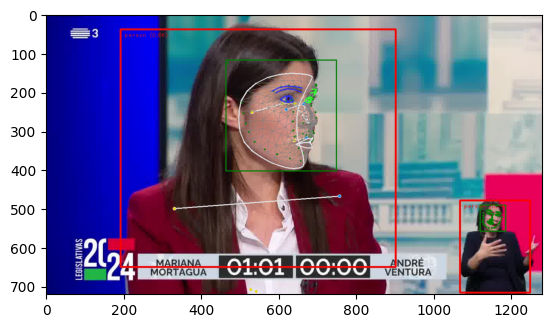

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(os.path.join('videos', video, frame_id))
plt.imshow(img)
plt.show()

pimg = Image.open(os.path.join('processed', video, frame_id))
plt.imshow(pimg)
plt.show()

In [ ]:
data.iloc[0]['detections']

[[192, 39, 710, 611, 'person', 0.85546875],
 [1068, 479, 181, 237, 'person', 0.73828125]]

In [ ]:
import numpy as np

poses = np.array(data.iloc[0]['poses'])

print(poses.shape) # 1 pose, 33 keypoints, 5 values [x,y,z,visibility,presence]

(1, 33, 5)


In [ ]:
#extra data (not mentioned in the description)

print(np.array(data.iloc[0]['faces']).shape)  # 1 face, 478 keypoints, 5 values [x,y,z,visibility,presence]

print(data.iloc[0]['text'])  # text identified with a (bad) OCR

(1, 478, 5)
['=3', '{2624', 'MRRAAA', 'O1:OI', 'OO:OO', 'vANPB)A']


In [ ]:
embedding = np.array(data.iloc[0]['embedding'])
print(embedding.shape, embedding)

(1024,) [  1 253 255 ...   8 254   4]


In [ ]:
fer = data.iloc[0]['fer']
print(fer) # list of dictionaries

[{'location': [463, 750, 117, 404], 'embedding': [-0.026538480073213577, -0.008725836873054504, -0.013646700419485569, 0.09758143872022629, -0.015916896983981133, 0.14475513994693756, 0.08344521373510361, -0.03397591784596443, 0.06874193251132965, 0.14760573208332062, 0.032510049641132355, 0.10449077934026718, -0.04842730984091759, 0.07645784318447113, -0.10792786628007889, -0.07056929916143417, 0.08577025681734085, -0.05665743723511696, 0.06517583876848221, 0.1520078182220459, 0.19754916429519653, -0.023436715826392174, 0.07819704711437225, -0.07709063589572906, 0.08018891513347626, -0.014752071350812912, -0.03240703418850899, 0.12098386883735657, 0.1281224638223648, 0.028188006952404976, -0.036349739879369736, 0.05845756456255913, -0.20035254955291748, -0.11162586510181427, 0.13223618268966675, 0.14860664308071136, -0.1579524278640747, -0.11458985507488251, 0.04910764470696449, -0.20531371235847473, 0.021427378058433533, 0.047758281230926514, 0.11196853220462799, -0.1179233118891716,

In [ ]:
print(len(fer)) # number of detected faces

2


In [ ]:
fer[0].keys()

dict_keys(['location', 'embedding', 'emotion', 'logits'])

In [ ]:
fer[0]['location']

[463, 750, 117, 404]

In [ ]:
print(np.array(fer[0]['embedding']).shape)

(128,)


In [ ]:
fer[0]['emotion']

'Neutral'

In [ ]:
fer[0]['logits']

array([-0.33778027, -0.08505477, -0.05803427,  0.20175289, -2.5114517 ,
        0.5961187 , -0.2507982 ,  0.2440162 ], dtype=float32)